# Assignment 2
## Due May 3rd
### Jennifer Them (3837649), Florence Lopez (3878792)

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances

# Exercise 1

Here we define the function that will generate our data

In [56]:
def get_gaussian2d_data_with_labels(n1, n2):
    
    # This is to garantee that we all have the same data points
    np.random.seed(n1+n2)
    
    mu1 = [1, 1]
    var1 = [[0.2, 0],
            [0, 0.2]]
    
    mu2 = [3, 1]
    var2 = [[2, 0],
            [0, 2]]
    
    data = np.concatenate([np.random.multivariate_normal(mu1, var1, n1),
                           np.random.multivariate_normal(mu2, var2, n2)])
    
    labels = np.concatenate([np.repeat(1, n1),
                             np.repeat(2, n2)])
                           
    return data, labels  

## a)

Create train dataset and plot it

In [57]:
train_n1, train_n2 = 25, 25
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

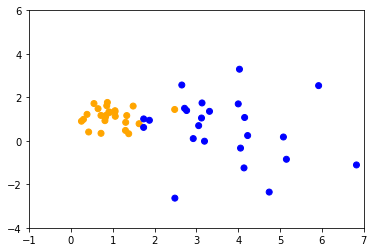

In [58]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in train_labels]
plt.scatter(train_data[:, 0], train_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

Create test dataset and plot it

In [59]:
test_n1, test_n2 = 100, 100
test_data, test_labels = get_gaussian2d_data_with_labels(test_n1, test_n2)

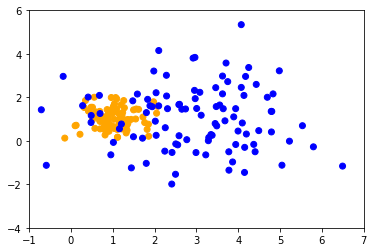

In [60]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in test_labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## b)

Define knn and predict with $k = 3$ and plot the result

In [61]:
def knnClassify(train_data, train_labels, test_data, k=1):
    pred_labels = []
    for point in test_data:
        dist = np.sqrt(np.sum((point - train_data)**2, axis=1))
        sort_index = np.argsort(dist)
        labels = list(train_labels[sort_index[:k]])
        if labels.count(1) > labels.count(2):
            pred_label = 1
        else:
            pred_label = 2
        pred_labels.append(pred_label)
        
    return pred_labels

In [62]:
labels = knnClassify(train_data, train_labels, test_data, 3)

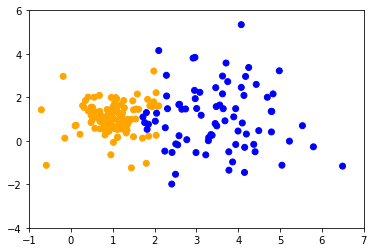

In [63]:
fig = plt.figure()
color = ['orange' if l == 1 else 'blue' for l in labels]
plt.scatter(test_data[:, 0], test_data[:, 1], c=color)
plt.xlim([-1, 7])
plt.ylim([-4, 6])
plt.show()

## c)

Plot the correct predictions in black and the wrong one in red

Expectations: In the area at the right side where we have primarly the blue color the prediction will be true. But in the middle and on the left we have an overlap of blue and orange so the prediction is prone to mistakes.

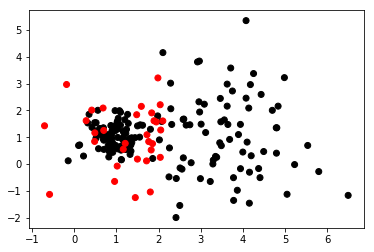

In [64]:
# Because n1 is label 1 -> first 100
# n2 is label 2 --> 100:200
correct_preds0 = ["black" if labels[j]==1 else "red" for j in range(100)]
correct_preds1 = ["black" if labels[j]==2 else "red" for j in range(100,200)]
correct_preds = correct_preds0 + correct_preds1
fig = plt.figure()
plt.scatter(test_data[:, 0], test_data[:, 1], c=correct_preds)

## d)

define the empirical risk with 0-1-loss and compute the 0-1 loss for the labels predicted above

In [72]:
def empRiskWith01loss(test_labels, labels):
    loss01= np.divide(np.sum(np.abs(np.subtract(test_labels, labels))),len(labels))
    return loss01

In [73]:
loss = empRiskWith01loss(test_labels, labels)

In [74]:
loss

0.155

Compute the risk for various k and plot it

In [75]:
# ks is array
ks = [1, 3, 5, 7, 10, 15, 20]
def compare(train_data, train_labels, test_data, test_labels, ks):
    emp_risk=[]
    for j in range (len(ks)):
        # labels_ks is array due to knnClassify
        labels_ks = knnClassify(train_data, train_labels, test_data, ks[j])
        # create array and increase it with append
        emp_risk.append(empRiskWith01loss(test_labels, labels_ks))
    return emp_risk

In [76]:
emp_risk=compare(train_data, train_labels, test_data, test_labels, ks)
# lowest risk at k = 7

Text(0,0.5,'emp_risk')

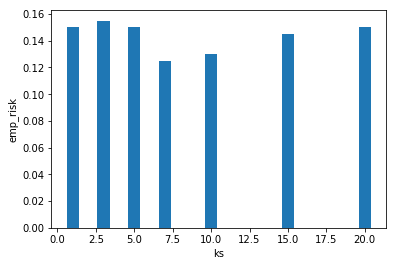

In [77]:
fig = plt.figure()
plt.bar(ks, emp_risk)
plt.xlabel("ks")
plt.ylabel("emp_risk")

### e)

Create train dataset with n1 = n2 = 500, plot it and repeat the same analysis as in d)

In [78]:
train_n1, train_n2 = 500, 500
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

In [79]:
ks = [1, 3, 5, 7, 10, 15, 20]
def compare(train_data, train_labels, test_data, test_labels, ks):
    emp_risk=[]
    for j in range (len(ks)):
        # labels_ks is array due to knnClassify
        labels_ks = knnClassify(train_data, train_labels, test_data, ks[j])
        # create array and increase it with append
        emp_risk.append(empRiskWith01loss(test_labels, labels_ks))
    return emp_risk

Text(0,0.5,'emp_risk')

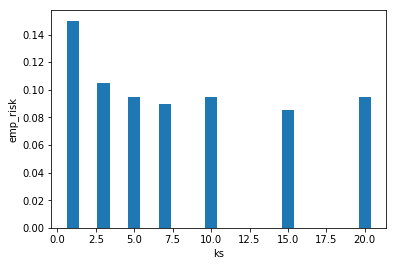

In [80]:
emp_risk=compare(train_data, train_labels, test_data, test_labels, ks)
fig = plt.figure()
plt.bar(ks, emp_risk)
plt.xlabel("ks")
plt.ylabel("emp_risk")

In [81]:
emp_risk

[0.15, 0.105, 0.095, 0.09, 0.095, 0.085, 0.095]

now k = 15 behaves best
more trainingspoints more neighbors -> the general rule for the number of neighbors is Neighbors=log(trainingspoints) this means the number of neighbors is higher for 500trainingspoints than for 100trainingspoints ->so more neighbors means less risk in this case

### f)

Create train dataset with n1 = n2 = 1000, plot it and repeat the same analysis as in d)

In [82]:
train_n1, train_n2 = 1000, 1000
train_data, train_labels = get_gaussian2d_data_with_labels(train_n1, train_n2)

In [83]:
ks = [1, 3, 5, 7, 10, 15, 20]
def compare(train_data, train_labels, test_data, test_labels, ks):
    emp_risk=[]
    for j in range (len(ks)):
        # labels_ks is array due to knnClassify
        labels_ks = knnClassify(train_data, train_labels, test_data, ks[j])
        # create array and increase it with append
        emp_risk.append(empRiskWith01loss(test_labels, labels_ks))
    return emp_risk

Text(0,0.5,'emp_risk')

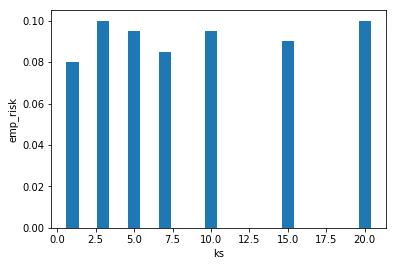

In [84]:
emp_risk=compare(train_data, train_labels, test_data, test_labels, ks)
fig = plt.figure()
plt.bar(ks, emp_risk)
plt.xlabel("ks")
plt.ylabel("emp_risk")

In [85]:
emp_risk

[0.08, 0.1, 0.095, 0.085, 0.095, 0.09, 0.1]

# Exercise 2
Load data and show one class

In [86]:
train_df = pd.read_csv('train.csv', sep='\t',)
train_data = train_df.drop(['Label'], axis=1).as_matrix()
train_labels = train_df['Label'].as_matrix()
test_df = pd.read_csv('test.csv', sep='\t')
test_data = test_df.drop(['Label'], axis=1).as_matrix()
test_labels = test_df['Label'].as_matrix()

## a)

Find out if the dataset is balanced

In [87]:
# test data
# if (1 1 4 4 3 4 2 1) --> (1 2 3 4) - sorted
unique, counts = np.unique(test_labels, return_counts=True)
# dict: assignment, zip concatinates 
dict(zip(unique, counts))

{0: 100,
 1: 100,
 2: 100,
 3: 100,
 4: 100,
 5: 100,
 6: 100,
 7: 100,
 8: 100,
 9: 100}

The trainingsset is balanced because we have the same number of every entry

In [88]:
# train data
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

## b)

Compute knn for the USPS dataset

In [89]:
def knnClassify_eff(train_data, train_labels, test_data, k=1):
    pred_labels = []
    dist = euclidean_distances(test_data, train_data)
    for i in range(len(test_data)):
        sort_index = np.argsort(dist[i])
        labels = list(train_labels[sort_index[:k]])
        unique, count = np.unique(labels, return_counts = True)
        dict_labels = dict(zip(unique, count))
        max_label = max(dict_labels, key=dict_labels.get)
        pred_labels.append(max_label)
    return pred_labels

Text(0,0.5,'emp_risk')

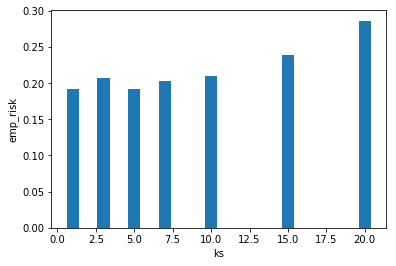

In [90]:
# plot for different ks 
def compareEfficient(train_data, train_labels, test_data, test_labels, ks):
    emp_risk=[]
    for j in range (len(ks)):
        # labels_ks is array due to knnClassify
        labels_ks = knnClassify_eff(train_data, train_labels, test_data, ks[j])
        # create array and increase it with append
        emp_risk.append(empRiskWith01loss(test_labels, labels_ks))
    return emp_risk
ks = [1, 3, 5, 7, 10, 15, 20]
emp_risk=compareEfficient(train_data, train_labels, test_data, test_labels, ks)
fig = plt.figure()
plt.bar(ks, emp_risk)
plt.xlabel("ks")
plt.ylabel("emp_risk")